# Introduction
We want to solve the Forest Cover Type Problem, to predict an integer classification for the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.
The seven types are:

1 - Spruce/Fir <br>
2 - Lodgepole Pine <br>
3 - Ponderosa Pine <br>
4 - Cottonwood/Willow <br>
5 - Aspen <br>
6 - Douglas-fir <br>
7 - Krummholz <br>

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. To predict the Cover_Type for every row in the test set (565892 observations).

Introduction
● Introduce the problem that you’re going to analyse.
○ Some background information.
○ The kind of data.
○ State the goal.
○ Motivation.
● What is your approach.
○ How are you going to solve the problem.
● State your claims.

Dateset
Where/how did you get the data?
● Some information on how the data was (originally) collected.
● Summary description of the data: number of rows and
columns.
● What are inside the dataset (data dictionary): what are the
features and the data types. What is the target class.

Processing
● Data screening/cleaning
○ Data validation (valid range, internal consistency).
○ Missing values.
○ etc.
● Normalization
● Split data into training, validation and testing
● Feature selection (This can be in the experiment.)

Experiment/Analysis 
● Explain the methods and algorithms.
● Describe the processes/experiment.
● Any optimization? (e.g. hyperparameters tuning etc.)
● Show the results and discuss.
+ Do show some meaningful work here (You can use Weka,
but don’t just copy-paste the output).

Conclusion
● Summarize your findings, and restate your claims.
● What have you learned? Is there any way to improve?
● Any future direction?

## Data Exploration
### Visualization
For plotting, Matplotlib and Seaborn should suffice.

In [69]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install plotly
#!pip install missingno


# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.style as psy
#%matplotlib inline

# Set seaborn scheme
import seaborn as sns
sns.set(style="whitegrid")

# Displaying figure
import plotly.graph_objects as go

# Generating offline graphs within notebook
import plotly.offline as plf
plf.init_notebook_mode(connected=True)

import missingno as msno

from sklearn import preprocessing


### 1. Dataset Preparation

In [70]:
train_df = pd.read_csv("train.csv")

train_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


#### Data Fields

Attributes<br>
There are 12 features / attributes as following:<br>
<strong>Elevation</strong> - Elevation in meters, <strong>numerical</strong><br>
<strong>Aspect</strong> - Aspect in degrees azimuth, <strong>numerical</strong> <br>
<strong>Slope</strong> - Slope in degrees, <strong>numerical</strong> <br>
<strong>Horizontal_Distance_To_Hydrology</strong> - Horz Dist to nearest surface water features, <strong>numerical</strong> <br>
<strong>Vertical_Distance_To_Hydrology</strong> - Vert Dist to nearest surface water features,  <strong>numerical</strong> <br>
<strong>Horizontal_Distance_To_Roadways</strong> - Horz Dist to nearest roadway, <strong>numerical</strong><br>
<strong>Hillshade_9am</strong>  (0 to 255 index) - Hillshade index at 9am, summer solstice, <strong>numerical</strong> <br>
<strong>Hillshade_Noon</strong>  (0 to 255 index) - Hillshade index at noon, summer solstice,  <strong>numerical</strong> <br>
<strong>Hillshade_3pm</strong>  (0 to 255 index)- Hillshade index at 3pm, summer solstice, <strong>numerical</strong> <br>
<strong>Horizontal_Distance_To_Fire_Points</strong> - Horz Dist to nearest wildfire ignition points, <strong>numerical</strong> <br>
<strong>Wilderness_Area</strong> (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation, <strong>categorical</strong> <br>
<strong>Soil_Type</strong> (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation, <strong>categorical</strong><br>

Class<br>
<strong>Cover_Type</strong> (7 types, integers 1 to 7) - Forest Cover Type designation, <strong>categorical</strong><br>

In [71]:
numerical_features = ['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

OHE_features = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4',
       'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

categorical_features = ['Wilderness_Area', 'Soil_Type']

cover_type = {1:'Spruce/Fir',2:'Lodgepole Pine',3:'Ponderosa Pine',4 : 'Cottonwood/Willow',5 : 'Aspen',6:'Douglas-fir',7:'Krummholz'}

wilderness_areas ={1:'Rawah',2:'Neota',3:'Comanche Peak',4:'Cache la Poudre'}

soil_types = {1: 'Cathedral',2: 'Vanet - Ratake',3: 'Haploborolis',4: 'Ratake',5: 'Vanet',6: 'Vanet - Wetmore',7: 'Gothic',8: 'Supervisor - Limber',9: 'Troutville family',10: 'Rock outcrop',
11: 'Rock land',12: 'Legault',13: 'Catamount',14: 'Pachic Argiborolis',15: 'unspecified',16: 'Cryaquolis - Cryoborolis',17: 'Gateview',18: 'Rogert',19: 'Typic Cryaquolis',20: 'Typic Cryaquepts',
21: 'Typic Cryaquolls',22: 'Leighcan extremely bouldery',23: 'Leighcan - Typic Cryaquolls',24: 'Leighcan extremely stony',25: 'Leighcan warm, extremely stony',26: 'Granile - Catamount',27: 'Leighcan, warm',
28: 'Leighcan',29: 'Como - Legault',30: 'Como',31: 'Leighcan - Catamount',32: 'Catamount',33: 'Leighcan - Catamount - Rock outcrop',34: 'Cryorthents',35: 'Cryumbrepts',36: 'Bross',37: 'Rock - Cryumbrepts - Cryorthents',
38: 'Leighcan - Moran',39: 'Moran Leighcan',40: 'Moran Rock',41: 'NaN'}

In [72]:
# Create categorical features for Wilderness_Area
for i in range(1,5):
    train_df.loc[train_df['Wilderness_Area' + str(i)] == 1, 'Wilderness_Area'] = i
    
    
# Create categorical features for Soil_Type
for i in range(1,40):
    train_df.loc[train_df['Soil_Type' + str(i)] == 1, 'Soil_Type'] = i
    


### 2. Data Preprocessing
● Data screening/cleaning 

    ○ Data validation (valid range, internal consistency).
    ○ Missing values.
    ○ etc.
● Normalization

● Split data into training, validation and testing

● Feature selection 
####  2.1 Missing value

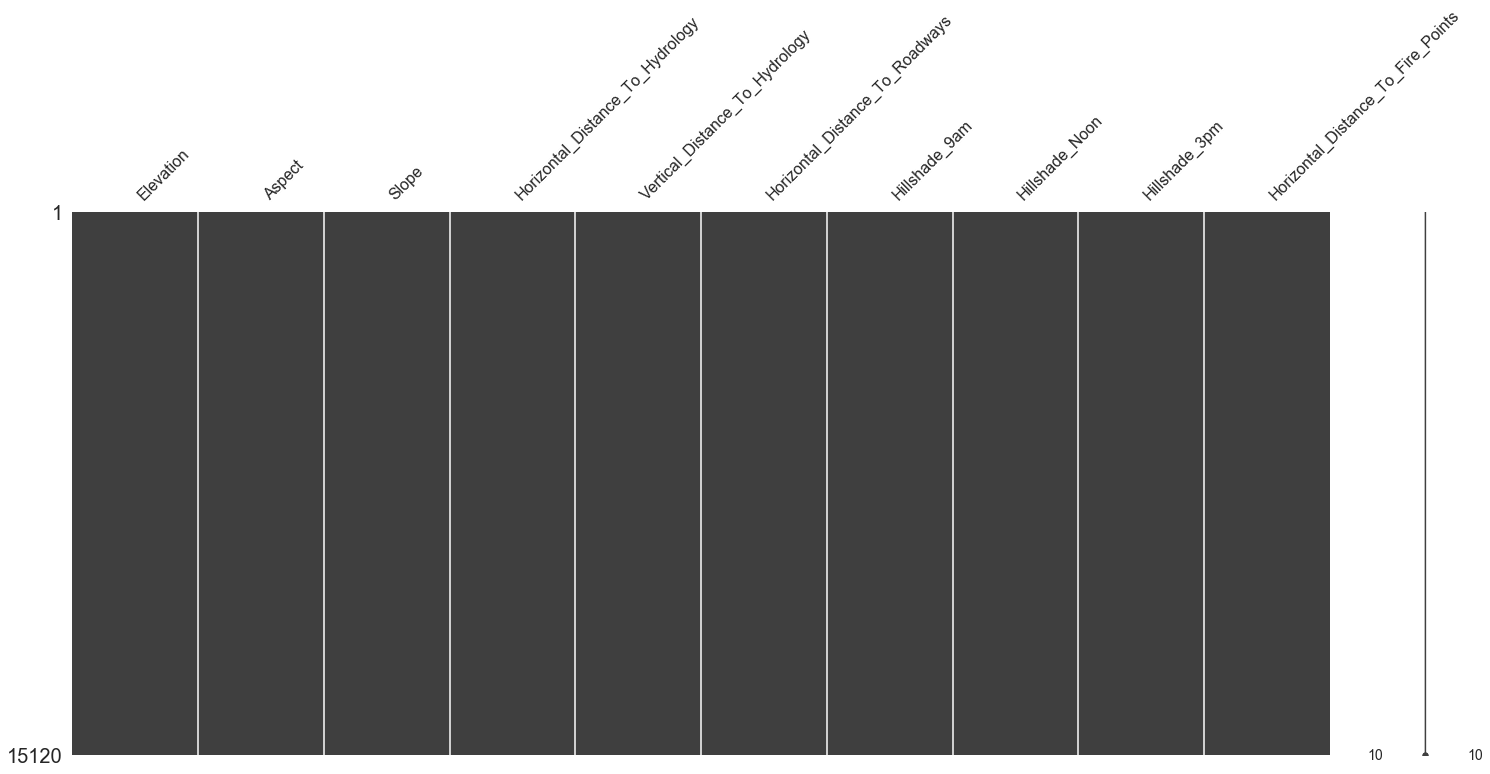

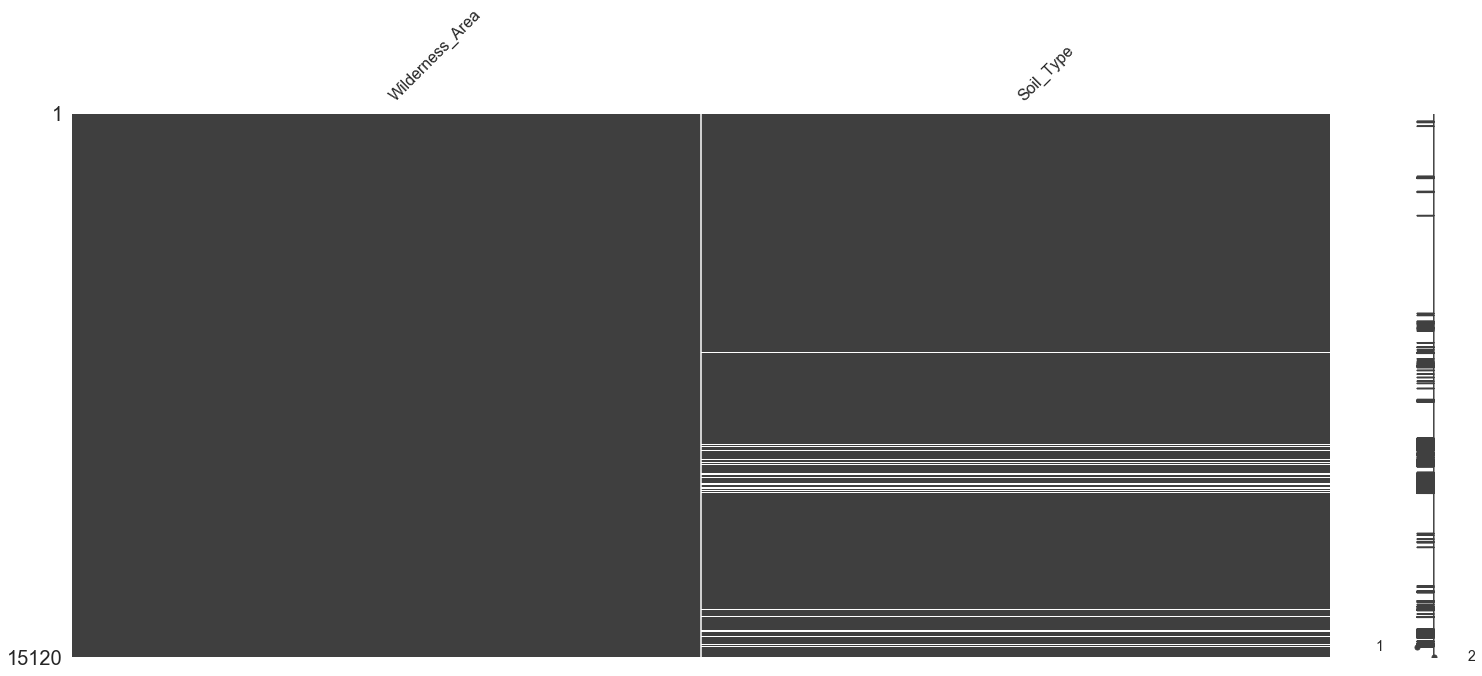

In [73]:
# check missing value
msno.matrix(train_df[numerical_features])
msno.matrix(train_df[categorical_features])

#train_df.loc[train_df['Soil_Type'].isnull()]

In [74]:
# Fill 'Soil_Type' missing value with 41 
train_df.Soil_Type.fillna(41, inplace=True)

#train_df.loc[train_df['Soil_Type'].isnull()]

In [75]:
#Saving Ids
train_ID = train_df['Id']


#Dropping Ids
#train_df.drop("Id", axis = 1, inplace = True)
#test_df.drop("Id", axis = 1, inplace = True)

train_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness_Area,Soil_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,5,1.0,29.0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,5,1.0,29.0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,2,1.0,12.0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,2,1.0,30.0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,5,1.0,29.0


### 2.2 Outlier

In [76]:
train_df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness_Area,Soil_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.00000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000,2.800397,19.20172
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066,1.119832,12.67810
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,10.00000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,17.00000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,30.00000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,41.00000


### Feature Engineering
#### New Feature
- Square root (big value): Elevation, Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Roadways
- Log (small value): Slope
- Mean: Hillshade_9am & Hillshade_Noon & Hillshade_3pm
- Aspect Direction: Values[1 = north facing (338-22),2 =nw facing (23 - 67), 3=west facing (68 - 112), 4 =sw facing (113-157), 5 =south facing (158-202), 6 =se facing (203 - 247), 7 = east facing (248-292), 8=ne facing (293-337)  

In [77]:
sqrt_Elevation = np.sqrt(train_df['Elevation'])
# sqrt_Elevation 
sqrt_Horizontal_Distance_To_Fire_Points = np.sqrt(train_df['Horizontal_Distance_To_Fire_Points'])
# sqrt_Horizontal_Distance_To_Fire_Points
sqrt_Horizontal_Distance_To_Roadways = np.sqrt(train_df['Horizontal_Distance_To_Roadways'])
# sqrt_Horizontal_Distance_To_Roadways
# log_slope = np.log(train_df['Slope']) # possibly 0 in value

log_slope = np.log(train_df['Slope'] - (min(train_df['Slope']) - 1)) 

mean_Hillshade = (train_df.Hillshade_9am + train_df.Hillshade_Noon +train_df.Hillshade_3pm)/3
# mean_Hillshade


In [78]:
#1 = [338,22] ; 2 = [23, 67], 3= [68, 112], 4 =[113,157], 5 = [158,202], 6 = [203,247], 7 = [248,292], 8=[293,337]  
aspect_Direction = []
for i in range(len(train_df['Aspect'])):
    #print(i, train_df['Aspect'][i])
    if train_df['Aspect'][i] >= 330 or train_df['Aspect'][i] <= 22:
        aspect_Direction.append(1)
    elif train_df['Aspect'][i] >= 23 and train_df['Aspect'][i] <= 67:
        aspect_Direction.append(2)
    elif train_df['Aspect'][i] >= 68 and train_df['Aspect'][i] <= 112:
        aspect_Direction.append(3)
    elif train_df['Aspect'][i] >= 113 and train_df['Aspect'][i] <= 157:
        aspect_Direction.append(4)
    elif train_df['Aspect'][i] >= 158 and train_df['Aspect'][i] <= 202:
        aspect_Direction.append(5)
    elif train_df['Aspect'][i] >= 203 and train_df['Aspect'][i] <= 247:
        aspect_Direction.append(6)
    elif train_df['Aspect'][i] >= 248 and train_df['Aspect'][i] <= 292:
        aspect_Direction.append(7)
    elif train_df['Aspect'][i] >= 293 and train_df['Aspect'][i] <= 337:
        aspect_Direction.append(8)



In [79]:
CoverType = []
CoverType = train_df['Cover_Type']
# CoverType.head()

In [80]:
zippedList =  list(zip(sqrt_Elevation, sqrt_Horizontal_Distance_To_Fire_Points,sqrt_Horizontal_Distance_To_Roadways, log_slope, mean_Hillshade,aspect_Direction,CoverType))

data_B = pd.DataFrame(zippedList, columns =['sqrt_Elevation','sqrt_Horizontal_Distance_To_Fire_Points', 
                          'sqrt_Horizontal_Distance_To_Roadways','log_slope','mean_Hillshade','aspect_Direction','Cover_Type']) 
# Six new features combined as data_B for training
# data_B = pd.concat([sqrt_Elevation, sqrt_Horizontal_Distance_To_Fire_Points, 
#                      sqrt_Horizontal_Distance_To_Roadways, log_slope, mean_Hillshade,aspect_Direction,CoverType], axis=1)

# data_B.columns = ['sqrt_Elevation','sqrt_Horizontal_Distance_To_Fire_Points', 
#                           ' sqrt_Horizontal_Distance_To_Roadways','log_slope','mean_Hillshade','aspect_Direction','Cover_Type']

data_B.isnull().values.any()



cols_to_norm = ['sqrt_Elevation','sqrt_Horizontal_Distance_To_Fire_Points', 
                          'sqrt_Horizontal_Distance_To_Roadways','log_slope','mean_Hillshade']
data_B[cols_to_norm] = data_B[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# normalized_data_B =data_B.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
# normalized_data_B
data_B.head()
data_B.shape
data_B.to_csv('data_B.csv',index = None)



RFC: 0.798617 (0.009420)
XTC: 0.809611 (0.005793)


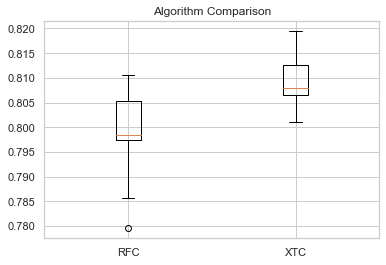

In [81]:
# compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load dataset

names = ['sqrt_Elevation','sqrt_Horizontal_Distance_To_Fire_Points', 
                          ' sqrt_Horizontal_Distance_To_Roadways','log_slope','mean_Hillshade','aspect_Direction','Cover_Type']



# Split-out validation dataset
array = data_B.values
X = array[:,0:6]
y = array[:,6]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)


# Spot Check Algorithms
models = []

Y_train = Y_train.astype('float')
Y_validator = Y_validation.astype('float')
# models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('RFC', RandomForestClassifier(n_estimators=200, max_features=5)))
# models.append(('ABC', AdaBoostClassifier(n_estimators=100, random_state=1)))
models.append(('XTC', ExtraTreesClassifier(n_estimators=200, max_features=5)))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [82]:
# knn = KNeighborsClassifier()
# knn.fit(X_train, Y_train)
# predictions = knn.predict(X_validation)
# print(accuracy_score(Y_validation, predictions))
# print(confusion_matrix(Y_validation, predictions))
# print(classification_report(Y_validation, predictions))